In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carga del conjunto de datos

In [47]:
# Cargar el dataset
df = pd.read_csv("food_crisis/data/clean_food_prices.csv") 

## Análisis Exploratorio de Datos (EDA)

En primer lugar, se muestran las primeras filas para obtener una vista preliminar de los datos.
Después se muestra información sobre los tipos de datos y valores nulos.
Y también se muestran las estadísticas básicas del conjunto de datos. 

In [48]:
# EDA: Exploración de datos
print("Primeras filas del dataset: ")
print(df.head())

Primeras filas del dataset: 
                             countryiso3        date        admin1  \
0        Bolivia, Plurinational State of  2020-09-15        Potosí   
1  Congo, The Democratic Republic of the  2024-03-15     Nord-Kivu   
2                            Afghanistan  2023-03-15         Balkh   
3                               Cameroon  2024-07-15  Extrême-Nord   
4      Venezuela, Bolivarian Republic of  2024-05-15       Monagas   

          admin2     market  market_id  latitude  longitude  \
0    Tomas Frias     Potosi        311    -19.58     -65.75   
1         Lubero    Kimbulu       9885     -0.05      29.23   
2  Nahr-e- Shahi      Balkh       3691     36.67      67.08   
3   Mayo-Tsanaga     Mogode       7632     10.61      13.57   
4     Libertador  Temblador       9012      9.01     -62.64   

             category          commodity  ...  priceflag  pricetype  \
0  cereals and tubers    Noodles (short)  ...     actual     Retail   
1  miscellaneous food        

Se muestran las 5 primeras líneas del DataFrame de forma que rápidamente se puede ver como están organizados los datos.

In [49]:
print("\nInformación general del dataset: ")
print(df.info())


Información general del dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8266 entries, 0 to 8265
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   countryiso3   8266 non-null   object 
 1   date          8266 non-null   object 
 2   admin1        8266 non-null   object 
 3   admin2        8266 non-null   object 
 4   market        8266 non-null   object 
 5   market_id     8266 non-null   int64  
 6   latitude      8266 non-null   float64
 7   longitude     8266 non-null   float64
 8   category      8266 non-null   object 
 9   commodity     8266 non-null   object 
 10  commodity_id  8266 non-null   int64  
 11  unit          8266 non-null   object 
 12  priceflag     8266 non-null   object 
 13  pricetype     8266 non-null   object 
 14  currency      8266 non-null   object 
 15  price         8266 non-null   float64
 16  usdprice      8266 non-null   float64
 17  year          8266 non-null   int64 

Se muestra un resumen que incluye el número de filas, columnas y los tipos de cada columna. También muestra el número de valores no nulos por columna.

En este caso, hay 828.913 entradas o registros de datos (filas) y hay 17 columnas. 
Existen datos de tipo object que se usan para texto o categorías, y datos de tipo float64 que se usan para datos numéricos como precios o coordenadas.
Hay algunas columnas o variables que tienen datos nulos, ya que no todas tienen el mismo número de datos no nulos como registros hay. Estas son: "adm1+name", 
"adm2+name", "geo+lat", "geo+lon", y "value+usd".

In [50]:
print("\nEstadísticas descriptivas: ")
print(df.describe())


Estadísticas descriptivas: 
          market_id     latitude    longitude  commodity_id         price  \
count   8266.000000  8266.000000  8266.000000   8266.000000  8.266000e+03   
mean    2971.138761    12.293063    39.931736    322.820348  1.761329e+04   
std     2162.094836    15.189289    51.090320    294.544134  1.500641e+05   
min       80.000000   -32.950000  -103.350000     50.000000  1.900000e-01   
25%     1553.250000     4.180000     2.325000     96.000000  1.250000e+02   
50%     2644.000000    11.130000    34.430000    185.000000  7.150000e+02   
75%     3903.000000    18.440000    81.080000    460.000000  5.624665e+03   
max    10520.000000    53.200000   179.380000   1315.000000  6.600000e+06   

          usdprice         year        month     day      weekday  
count  8266.000000  8266.000000  8266.000000  8266.0  8266.000000  
mean     10.066636  2023.348173     6.418098    15.0     3.004839  
std     142.561625     0.798059     3.442608     0.0     1.970681  
min  

En los resultados anteriores, se obtenen las estadísticas descriptivas sobre las columnas numéricas del DataFrame. 
Estas estadísticas incluyen el conteo, la media, la desviación estándar, los valores mínimo y máximo y los percentiles 25%, 50% y 75%.

* count: número de valores no nulos en cada columna
* mean: la media/promedio de los valores
* std: la desviación estándar mide cuánto varían los datos con respecto a la media
* min: el valor mínimo
* 25%: percentil que muestra el rango en el que se encuentran el 25% de los datos
* 50%: mediana o percentil 50%
* 75%: percentil que muestra el rango en el que se encuentran el 75% de los datos
* max: el valor máximo

In [51]:
print("\Variables en el conjunto de datos: ")
print(df.columns)

\Variables en el conjunto de datos: 
Index(['countryiso3', 'date', 'admin1', 'admin2', 'market', 'market_id',
       'latitude', 'longitude', 'category', 'commodity', 'commodity_id',
       'unit', 'priceflag', 'pricetype', 'currency', 'price', 'usdprice',
       'year', 'month', 'day', 'weekday', 'region'],
      dtype='object')


Se obtiene una lista con los nombres de las columnas del DataFrame, que se correpsonden con las variables. Este listado es útil para ver cómo están  estructurados los datos.

El listado se corresponde con: 

* countryiso3: código del país en formato ISO de 3 letras
* date: fecha de registro de los datos
* admin1: nombre de la primera división administrativa de cada país
* admin2: nombre de la segunda división administrativa de cada país
* market: mercado en el que se registra ese precio
* market_id: identificador único para el mercado
* latitude: coordenada latitud del mercado
* longitude: coordenada longitud del mercado
* category: categoria del producto
* commodity: producto 
* commodity_id: identificador del producto
* unit: unidad de medida para el precio
* priceflag: tipo de precio
* pricetype: tipo de precio
* currency: moneda en la que se registra el precio
* price: precio local en la moneda local
* usdprice: precio local equivalente en USD
* year: año de la fecha
* month: mes de la fecha
* day: día de la fecha
* weekday: día de la semana en la fecha

In [52]:
categorical_columns = ['countryiso3', 'admin1', 'admin2', 'market', 'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency', 'region']

numeric_columns = ['latitude', 'longitude', 'price', 'usdprice', 'day', 'month','year', 'weekday']

### Relaciones entre variables numéricas

           latitude  longitude     price  usdprice  day     month      year  \
latitude   1.000000   0.000468  0.035535 -0.013427  NaN -0.018234  0.171033   
longitude  0.000468   1.000000  0.033111 -0.001296  NaN  0.018583  0.020787   
price      0.035535   0.033111  1.000000  0.575656  NaN  0.016424  0.008708   
usdprice  -0.013427  -0.001296  0.575656  1.000000  NaN  0.009034  0.012819   
day             NaN        NaN       NaN       NaN  NaN       NaN       NaN   
month     -0.018234   0.018583  0.016424  0.009034  NaN  1.000000 -0.274374   
year       0.171033   0.020787  0.008708  0.012819  NaN -0.274374  1.000000   
weekday   -0.006599  -0.009554  0.003539  0.003462  NaN  0.238127 -0.036075   

            weekday  
latitude  -0.006599  
longitude -0.009554  
price      0.003539  
usdprice   0.003462  
day             NaN  
month      0.238127  
year      -0.036075  
weekday    1.000000  


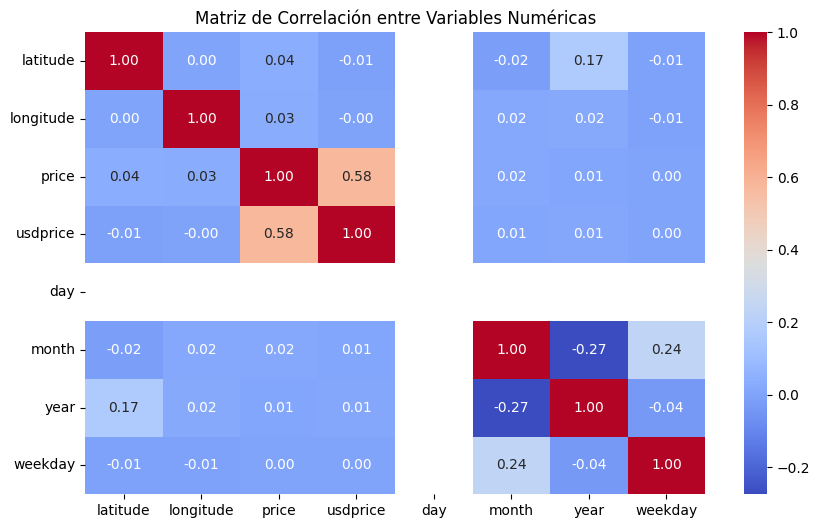

In [53]:
# Matriz de correlación
corr = df[numeric_columns].corr()

print(corr)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.savefig('food_crisis/graphics/stats/matriz_de_correlacion.png')
plt.show()

La matriz de correlaciones refleja las relaciones entre las variables. Se pueden observar algunas relaciones clave:

1. "price" y "usdprice": La correlación de 0.576 entre el precio y el precio en USD indica que hay cierta vinculación entre los cambios en uno y en otro. Es decir, al aumentar el "price" aumentara el "usdprice".

2. "latitude" y "longitude": La correlación de 0.0355 entre la latitud y el precio es bastante baja, lo que indica que no hay una relación significativa entre la ubicación geográfica en términos de latitud y el precio del producto. Esto sugiere que la latitud no es un factor determinante en los precios.

3. "month" y "weekday": Se observa una correlación de 0.238 entre el mes y el día de la semana. Esto sugiere que ciertos meses pueden estar asociados con días de la semana específicos, lo que podría reflejar patrones estacionales o de comportamiento del consumidor que influencian el comportamiento de compra a lo largo del tiempo.

4. "month" y "year": La correlación de -0.274 entre el mes y el año indica una relación negativa débil, lo que podría implicar que, a medida que avanzan los meses, se observa una ligera tendencia inversa con respecto al año. Es posible que los cambios estacionales o las variaciones anuales estén afectando a las variaciones mensuales, pero la relación no es fuerte.

En resumen, algunas variables, como el precio y el precio en USD, están algo relacionadas entre sí, lo que tiene sentido porque ambos reflejan el valor del mismo producto en diferentes monedas. 

Sin embargo, variables como la latitud parecen no tener casi ninguna relación con el precio, lo que indica que la ubicación geográfica no influye mucho en los costos. Además, la relación entre el mes y el día de la semana sugiere que podrían haber ciertos patrones o ciclos a lo largo del año que afectan el comportamiento de compra. A pesar de todo esto, la mayoría de las relaciones entre las variables son débiles, lo que sugiere que no hay conexiones fuertes entre ellas en este conjunto de datos.

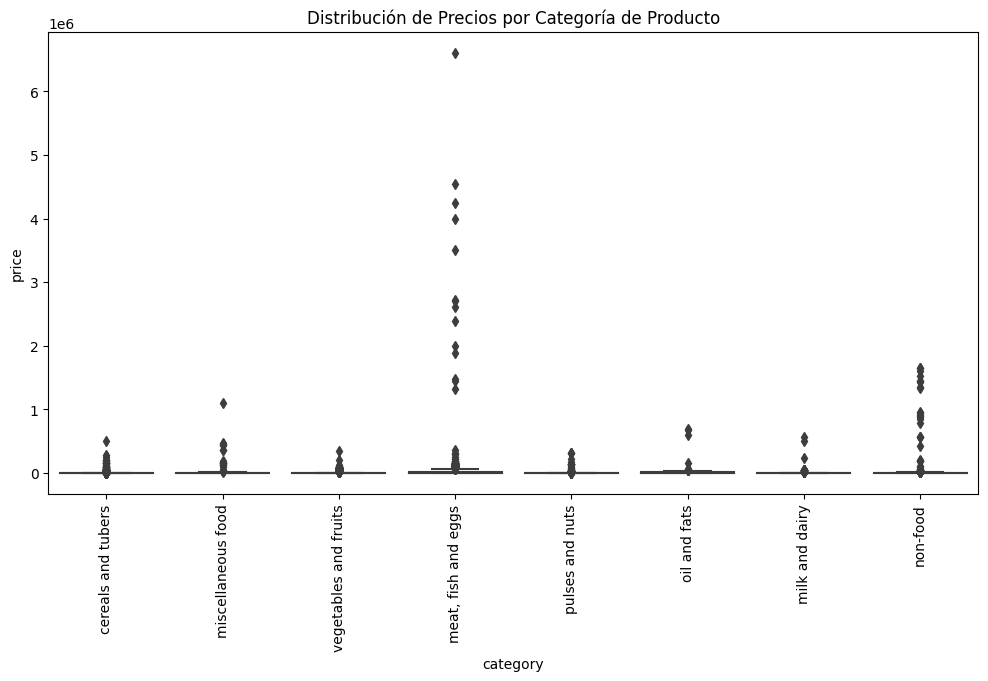

In [54]:
# Distribución de precios por categoría de producto

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df)
plt.title('Distribución de Precios por Categoría de Producto')
plt.xticks(rotation=90)
plt.savefig("food_crisis/graphics/stats/prices_categories_distribution.png")
plt.show()

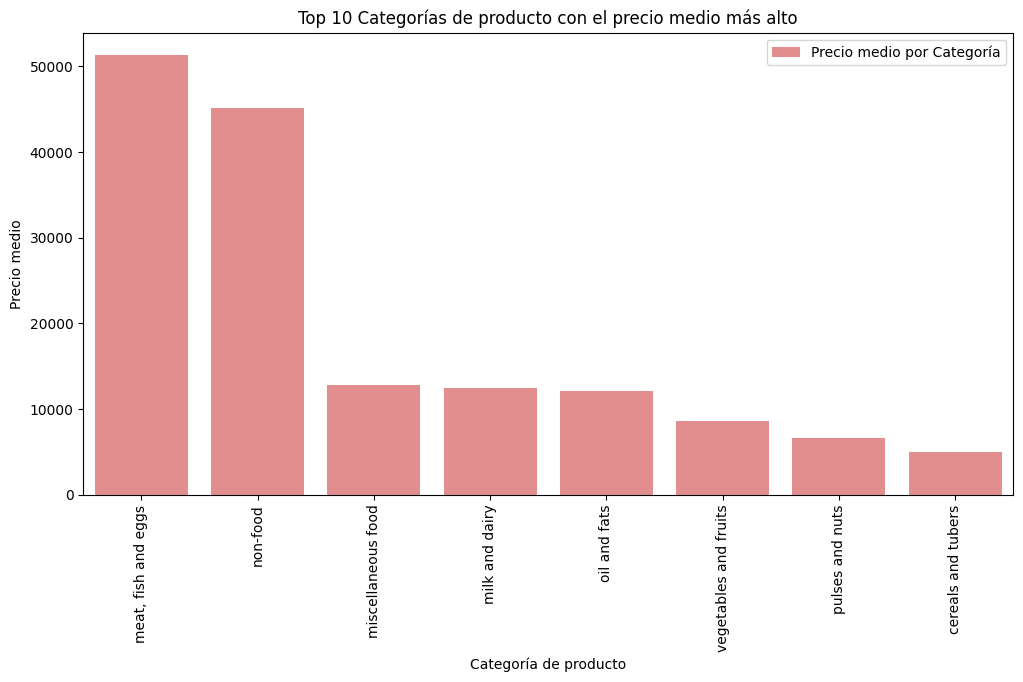

In [55]:
avg_price_by_category = df.groupby('category')['price'].mean().reset_index()
avg_price_by_category_sorted = avg_price_by_category.sort_values(by='price', ascending=False)
top_10_categories = avg_price_by_category_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='price', data=top_10_categories, color='lightcoral', label='Precio medio por Categoría')
plt.xticks(rotation=90)  # Rotar etiquetas si son muchas
plt.xlabel('Categoría de producto')
plt.ylabel('Precio medio')
plt.title('Top 10 Categorías de producto con el precio medio más alto')
plt.legend()
plt.savefig("food_crisis/graphics/stats/top_10_avg_price_by_category.png")
plt.show()


De acuerdo con el gráfico, las categorías con el precio promedio más elevado son "meat, fish and eggs", seguida de "non-food". 
Las demás categorías tienen un precio promedio menor en comparación. 

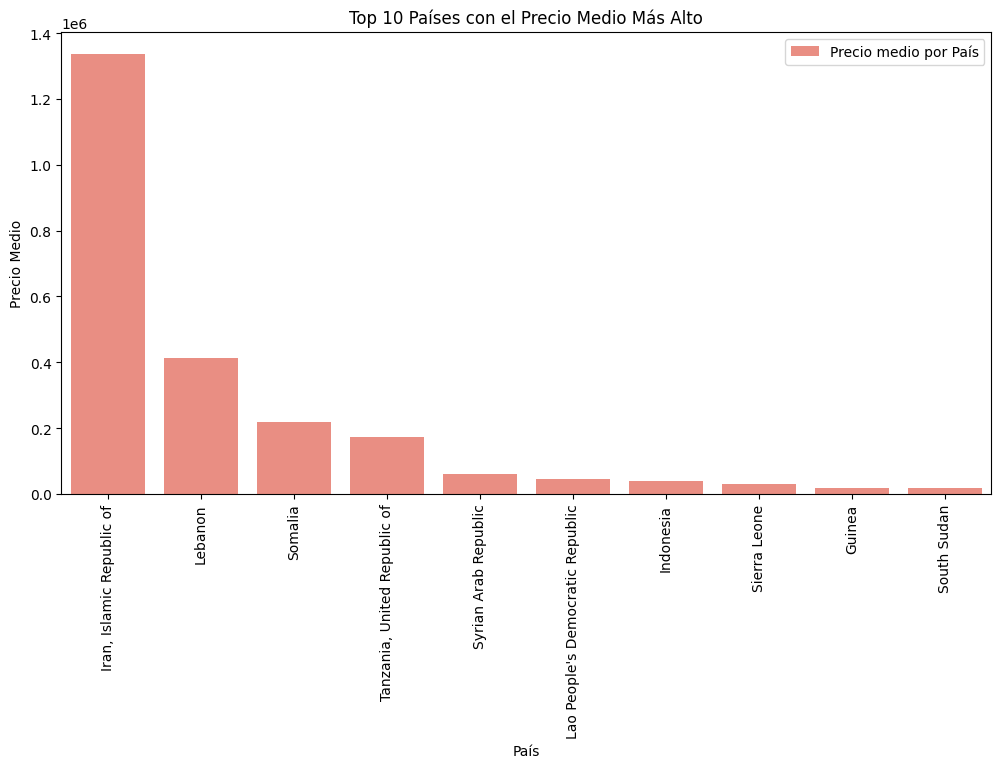

In [56]:
avg_price_by_country = df.groupby('countryiso3')['price'].mean().reset_index()
avg_price_by_country_sorted = avg_price_by_country.sort_values(by='price', ascending=False)

top_10_countries = avg_price_by_country_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='countryiso3', y='price', data=top_10_countries, color='salmon', label='Precio medio por País')
plt.xticks(rotation=90)  # Rotar etiquetas si son muchas
plt.xlabel('País')
plt.ylabel('Precio Medio')
plt.title('Top 10 Países con el Precio Medio Más Alto')
plt.legend()
plt.savefig("food_crisis/graphics/stats/top_10_avg_price_by_country.png")
plt.show()


De acuerdo al gráfico de los países con el precio medio más alto, se puede conocer que el ranking está encabezado por Irán, Lebanon, Somalia, Tanzania, Syrian Arab Republic, Indonesia, Sierra Leone, Guinea y South Sudan.

### Generación de gráficos de precio medio en las regiones para cada país

In [57]:
avg_price_by_country_region = df.groupby(['countryiso3', 'region'])['price'].mean().reset_index()

countries = avg_price_by_country_region['countryiso3'].unique()

for country in countries:
    # Filtrar los datos para ese país específico
    country_data = avg_price_by_country_region[avg_price_by_country_region['countryiso3'] == country]
    
    # Crear el gráfico para ese país
    plt.figure(figsize=(10, 6))
    sns.barplot(x='region', y='price', data=country_data, order=country_data['region'].unique(), color='skyblue')
    plt.xlabel('Región')
    plt.ylabel('Precio Medio')
    plt.title(f'Precio Medio por Región en {country}')
    plt.xticks(rotation=90)  # Rotar etiquetas de las regiones si es necesario
    plt.tight_layout()
    plt.savefig(f"food_crisis/graphics/stats/countries/avg_price_by_region_{country}.png")
    plt.close() 

print("Gráficos guardados exitosamente.")

Gráficos guardados exitosamente.


### Evolución de precios a lo largo del tiempo

<Figure size 1200x600 with 0 Axes>

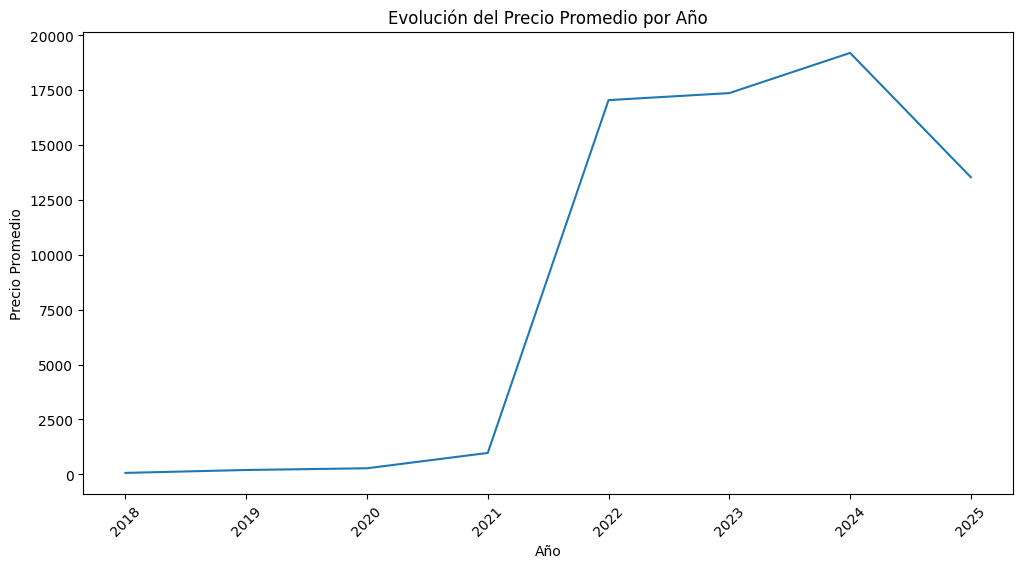

In [60]:
# Evolución de precios promedio a lo largo del tiempo (por año y mes)
plt.figure(figsize=(12, 6))
annual_prices = df.groupby('year')['price'].mean()


# Calcular el precio promedio por mes/año
monthly_prices = df.groupby('year')['price'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=annual_prices.index.astype(str), y=annual_prices.values)
plt.title('Evolución del Precio Promedio por Año')
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.savefig("food_crisis/graphics/stats/prices_over_time.png")
plt.show()

A partir de este gráfico de la evolución del precio medio por años desde 2028 hasta 2025, se puede observar cómo en los últimos años, sobre todo a partir del añoo 2021 se ha encarecido el precio medio de los productos mundialmente. 

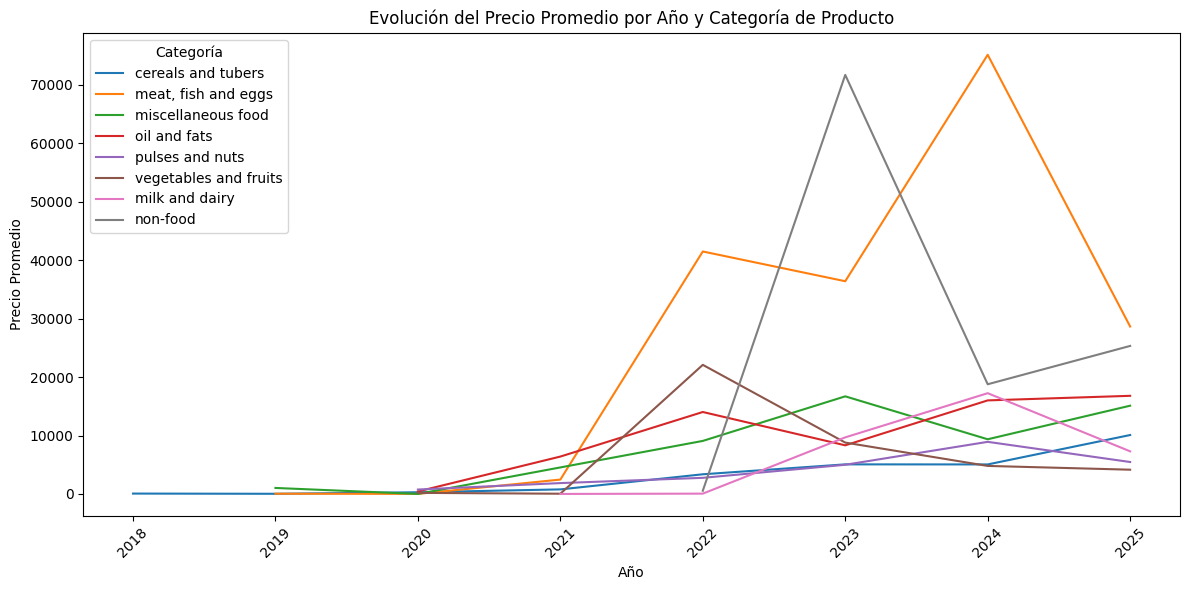

In [ ]:
annual_prices_by_category = df.groupby(['year', 'category'])['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', hue='category', data=annual_prices_by_category)
plt.title('Evolución del Precio Promedio por Año y Categoría de Producto')
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.legend(title='Categoría')
plt.tight_layout()
plt.savefig("food_crisis/graphics/stats/prices_by_category_over_time.png")
plt.show()

Como se puede observar en el gráfico de líneas de la evolución del precio promedio por año y por categoría de producto, hay categorías de producto que experimentaron una subida mucho mayor en los últimos 5 años como son la carne, pescado y huevos, y la categoría de cereales y tubérculos. 

### Distribuciones de variables en el conjunto de datos

C:\Users\nerea\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 6107 (\N{KHMER CURRENCY SYMBOL RIEL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nerea\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 2547 (\N{BENGALI RUPEE SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nerea\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Matplotlib currently does not support Bengali natively.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nerea\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\nerea\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 

<Figure size 1200x800 with 0 Axes>

C:\Users\nerea\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 6107 (\N{KHMER CURRENCY SYMBOL RIEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nerea\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2547 (\N{BENGALI RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nerea\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)


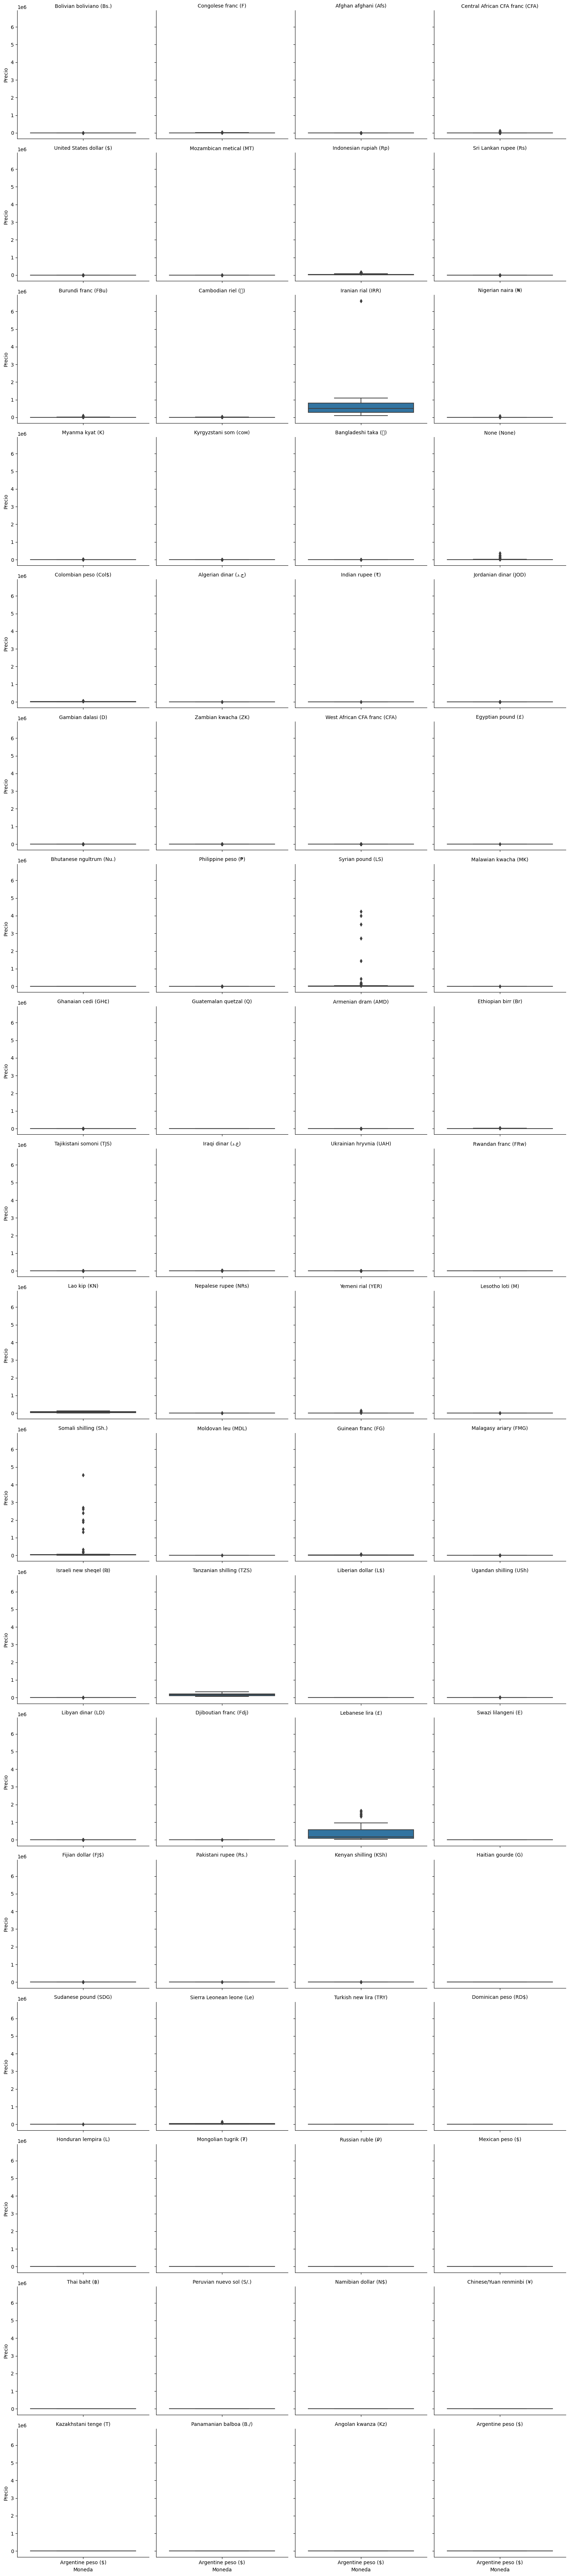

In [59]:
# Distribución de precios por tipo de moneda
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(df, col="currency", col_wrap=4, height=4)  
g.map(sns.boxplot, 'currency', 'price')

g.set_axis_labels('Moneda', 'Precio')
g.set_titles("{col_name}")
plt.tight_layout()
plt.savefig("food_crisis/graphics/stats/prices_over_currency.png")
plt.show()

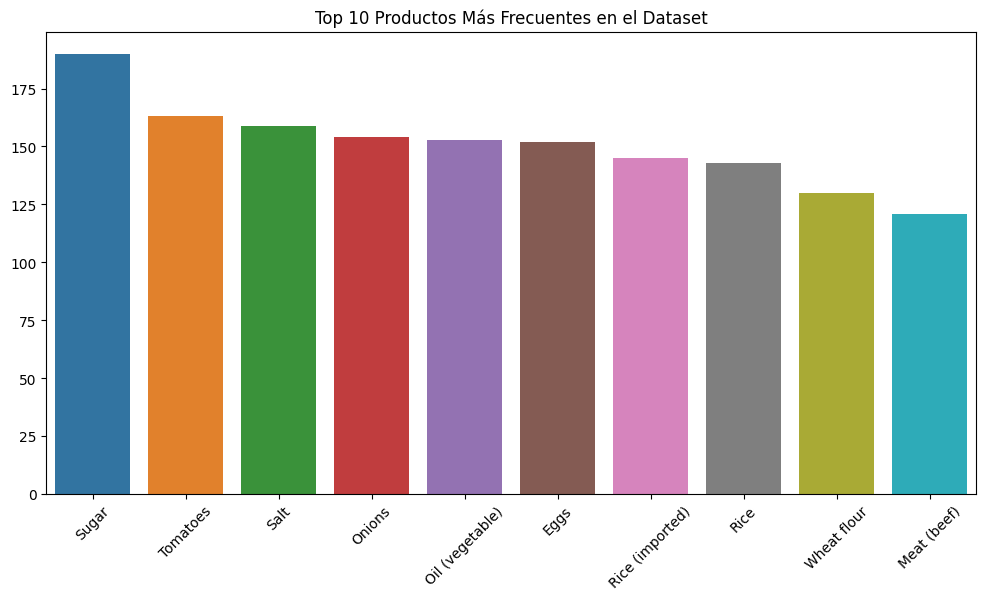

In [ ]:
# Análisis de la frecuencia de productos
plt.figure(figsize=(12, 6))
top_commodities = df['commodity'].value_counts().head(10)
sns.barplot(x=top_commodities.index, y=top_commodities.values)
plt.title('Top 10 Productos Más Frecuentes en el Dataset')
plt.xticks(rotation=45)
plt.savefig("food_crisis/graphics/stats/product_freq.png")
plt.show()


Se registraron mayor número de productos como el azúcar, seguido de los tomates, la sal, cebollas, aceite vegetal, huevos, arroz, harina de trigo o carne de res (vacas o toros).

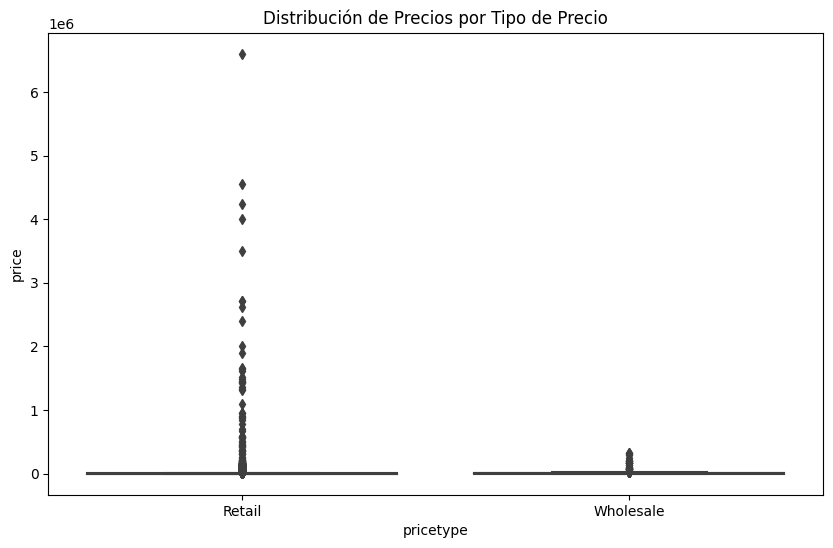

In [ ]:
# Distribución de precios según el tipo de precio 
plt.figure(figsize=(10, 6))
sns.boxplot(x='pricetype', y='price', data=df)
plt.title('Distribución de Precios por Tipo de Precio')
plt.savefig("food_crisis/graphics/stats/price_type.png")
plt.show()

En este caso, los tipos de precios pueden ser al por menor ("Retail") o al por mayor ("Wholesale"). 
De acuerdo a esta gráfica de distribución de precios por su tipo, hay más observaciones o registros de precios con tipo "Retail", lo que podría significar que hay más productos en este tipo de precio, por lo que podría generar una distribución más densa.

Dado que las líneas en ambas cajas se encuentran en medio esto representa que los datos están simétricamente distribuídos o equilibrados en torno a la mediana, por lo que se descarta la presencia de un sesgo.